In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# 데이터 로드
df = pd.read_csv("C:/AI/DL/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [4]:
# 결측치 확인 및 제거
df = df.dropna()

In [5]:
# 성별 인코딩
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
# 레이블 설정 rings를 범위를 나눠서 진행해보자!!!!!!
df['Rings'] = pd.cut(df['Rings'], bins=[0, 10, 20, 30], labels=[0, 1, 2])  # 3개 범주로 나눠보았으여

In [7]:
# 레이블 설정
y = df['Rings'].values  
X = df.drop('Rings', axis=1)

In [8]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((3132, 8), (3132,), (1045, 8), (1045,))

In [9]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# 입력 데이터 형태 변환
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
# LSTM 모델
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dense(3, activation='softmax')) #범위 3개로 나눰->3개 클래스 softmax

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 모델 훈련
model_history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# 예측
y_pred = model.predict(X_test)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6982 - loss: 0.8581 - val_accuracy: 0.7033 - val_loss: 0.5819
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7181 - loss: 0.5622 - val_accuracy: 0.7263 - val_loss: 0.5639
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.5736 - val_accuracy: 0.7167 - val_loss: 0.5623
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.5730 - val_accuracy: 0.7187 - val_loss: 0.5641
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.5837 - val_accuracy: 0.7292 - val_loss: 0.5487
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5515 - val_accuracy: 0.7330 - val_loss: 0.5400
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5475 - val_accuracy: 0.7244 - val_loss: 0.5383
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.5470 - val_accuracy: 0.7445 - val_loss:

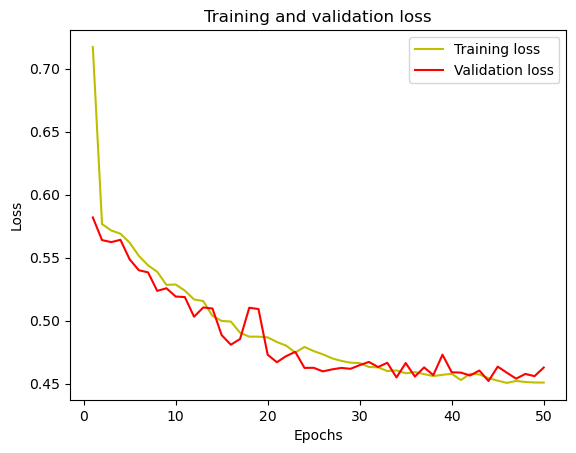

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

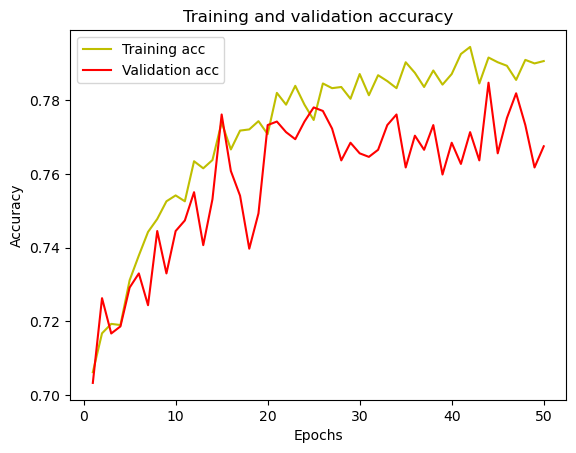

In [17]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()